# Quick and Easy Autoregressive Model

In [14]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot 

Do a quick, visual check to see if there is an autocorrelation in our time series dataset. 

Plot the temperature data (t) on the x-axis against the temperature on the previous day (t-1) on the y-axis.

You can see a large ball of observations along a diagonal line of the plot. 
This suggests a relationship or some correlation. 
You could repeat this for any other lagged observation, such as if we wanted to review the relationship with the last 7 days or with the same day last month or last year. 

You could calculate the correlation between the observation and the lag variable. We can use a statistical test like the Pearson’s correlation coeﬃcient. But I don't have the time to do that here.


In [10]:
# load dataset
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

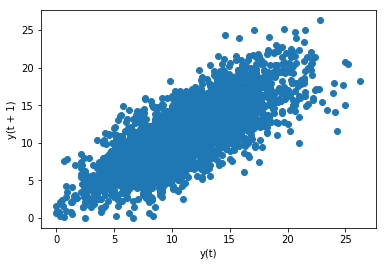

In [17]:
# lag plot of time series 
lag_plot(series)

Plot the correlation coeﬃcient for each lag variable. This can give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time. 

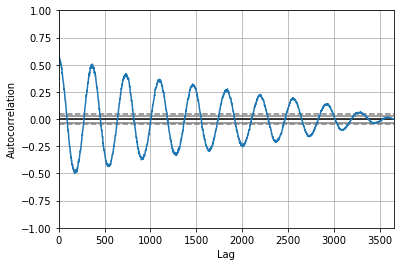

In [18]:
autocorrelation_plot(series)


In [5]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

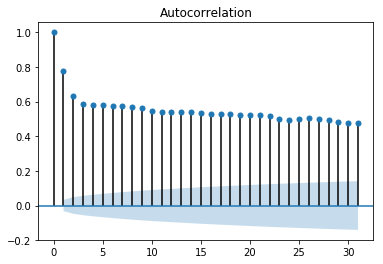

In [15]:
plot_acf(series, lags=31)
pyplot.show()

OK, let’s say that we want to develop a model to predict the last 7 days of minimum temperatures in the dataset given all prior observations. 

The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model. 

Develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as unseen data that we wish to predict. The predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. 

This means that we are not making a 7-day forecast, but 7 1-day forecasts.

Hope that makes sense :)


In [6]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [7]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


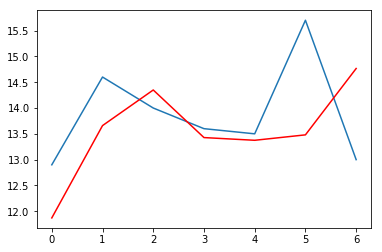

In [8]:
#  Line plot of the persistence forecast (red) on the Minimum Daily Temperatures dataset (blue).
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

An autoregression model is a linear regression model that uses lagged variables as input variables. 

The Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. 

Use this model by ﬁrst creating the model AR() and then calling fit() to train it on our dataset. 
Once ﬁt, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. 
This creates 1 7-day forecast, which is diﬀerent from the persistence example above.


In [22]:

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)


Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [23]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


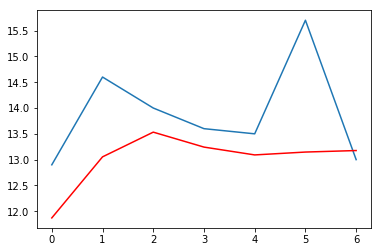

In [24]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

You could develop this by using a moving average model. :)